In [363]:
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.layers import Conv2D, Conv2DTranspose, Dense, Flatten, Reshape, MaxPool2D
from keras.models import Sequential
from keras.optimizers import Adam, SGD
import cv2
import matplotlib.pyplot as plt
import numpy as np
from imgaug import augmenters as iaa

# Load dataset and add some noise 

In [410]:
train_dataset, test_dataset = mnist.load_data()
def preprocess(dataset):
    xs, ys = dataset
    xs = xs / 255
    xs = np.expand_dims(xs, axis=3)
    ys = to_categorical(ys, 10)
    return xs, ys
def add_augmented_sample(xs):
    seq = iaa.Sequential([
        iaa.SaltAndPepper(0.05)
    ])
    xs = np.squeeze(xs)
    augmented_xs = seq(images=xs*255)
    augmented_xs = augmented_xs / 255
    outputs = np.append(xs, xs, axis=0)
    xs = np.append(xs, augmented_xs, axis=0)
    return np.expand_dims(xs, axis=3), np.expand_dims(outputs, axis=3)
xs_train, _ = preprocess(train_dataset)
xs_train, outputs = add_augmented_sample(xs_train)
xs_test, ys_test = preprocess(test_dataset)

In [330]:
model = Sequential()
model.add(Conv2D(8, kernel_size=(3,3), padding='same', strides=(2,2), activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(2, kernel_size=(3,3), padding='same', strides=(2,2), activation='relu'))
model.add(Conv2DTranspose(8, kernel_size=(3,3), padding='same', strides=(2,2),  activation='relu'))
model.add(Conv2DTranspose(1, kernel_size=(3,3), padding='same', strides=(2,2),  activation='relu'))

model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_140 (Conv2D)          (None, 14, 14, 8)         80        
_________________________________________________________________
conv2d_141 (Conv2D)          (None, 7, 7, 2)           146       
_________________________________________________________________
conv2d_transpose_128 (Conv2D (None, 14, 14, 8)         152       
_________________________________________________________________
conv2d_transpose_129 (Conv2D (None, 28, 28, 1)         73        
Total params: 451
Trainable params: 451
Non-trainable params: 0
_________________________________________________________________


In [331]:
model.compile(optimizer=Adam(lr=0.01), loss='mse', metrics=['acc'])

In [431]:
model.fit(xs_train, outputs, shuffle=True, batch_size=4)

Epoch 1/1
120000/120000 [==============================] - 131s 1ms/step - loss: 0.0101 - acc: 0.8132


In [210]:
model.evaluate(xs_test, xs_test)

10000/10000 [==============================] - 2s 178us/step


[7410.1257703125, 0.8072424739837647]

In [266]:
def visualize(img):
    fig = plt.figure(figsize=(8, 8))
    fig.add_subplot(1,2,1)
    plt.imshow(img, cmap='gray', vmin=0, vmax=1)
    img = np.expand_dims(img, axis=3)
    predicted_img = model.predict(np.array([img]))[0]
    predicted_img = np.squeeze(predicted_img)
    fig.add_subplot(1,2,2)
    plt.imshow(predicted_img, cmap='gray', vmin=0, vmax=1)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.
  """


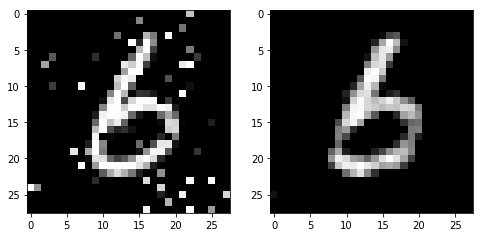

In [432]:
xs = xs_train
index = np.random.randint(0,len(xs))
img = np.squeeze(xs[index])
visualize(img)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.
  """


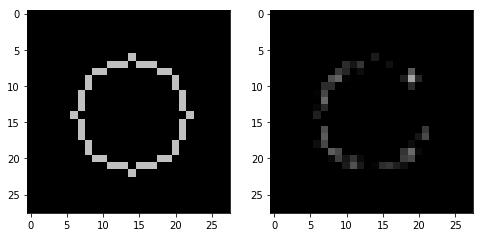

In [429]:
img = np.zeros((28,28))
img = cv2.circle(img, (14,14), 8, 0.75)
visualize(img)